# Aufgaben-Zettel 4
Auf diesem Zettel gibt es neben Wiederholungsaufgaben auch komplexere Aufgaben zu Techniken des Maschinellen Lernens. Diese Beispiele werden wir zukünftig in der Vorlesung noch ausgiebiger besprechen. Da die Vorlesung am Ostermontag ausfallen würde, haben Sie für diesen Zettel bis zum 20. April Zeit.



## Aufgabe (a)
Im IT Bereich hat man es oft mit großen Datenmengen zu tun, die erst mal ungeordnet sind. Die Aufgabe von Sortierverfahren ist es, diese Daten nach einem bestimmten Kriterium zu ordnen. Im Folgenden wollen wir ein Array mit zufälligen natürlichen Zahlen ordnen. Wir benutzen für die Erstellung das "random" Modul von numpy. Was bedeuten die Parameter hier:

In [191]:
import numpy as np
Zahlen = np.random.randint(20, size=30)

In [192]:
print(Zahlen)

[11 11  6 15 10 11 13 10  6  5  7  5 16  1  0 16 13  6  2  6  3  3 18  5
 16 10  3  4 18 13]


Eine sehr nützliche Funktion in numpy ist .shape.
Was tut diese Funktion?

In [193]:
Zahlen.shape

(30,)

Implementieren Sie eine Funktion, die zurückgibt ob das Array sortiert ist oder nicht.

In [194]:
def sortcheck(inp):
    flag = 0
    i = 1
    while i < len(inp): 
        if(inp[i] < inp[i - 1]): 
            flag = 1
        i += 1
    # printing result 
    if (not flag) : 
        return True
    else : 
        return False 


Implementieren Sie jetzt zwei Sortieralgorithmen:
1. Bubblesort
- Insertsort

Die Wikipedia Artikel der beiden Verfahren eignen sich gut um die Funktionsweise der Algorithmen zu verstehen. Wenden Sie die Verfahren dann auf die Daten an.

In [195]:
def bublesort(inp):
    for i in range(len(inp)):
        for x in range(len(inp)-1):
            if inp[x] > inp[x+1]:
                buff = inp[x]
                inp[x] = inp[x+1]
                inp[x+1] = buff
    return inp    

def insertsort(inp):
    for cnt in range(len(inp)-1):
        cnt1 = cnt + 1
        temp = inp[cnt1]
        while cnt1 > 0 and temp < inp[cnt1-1]:
            inp[cnt1] = inp[cnt1-1]
            cnt1 = cnt1 - 1
            inp[cnt1] = temp
    return inp
    
    
    
print(sortcheck(Zahlen))
print(Zahlen)
Zahlen_Neu = insertsort(Zahlen)
print(Zahlen_Neu)
print(sortcheck(Zahlen_Neu))

False
[11 11  6 15 10 11 13 10  6  5  7  5 16  1  0 16 13  6  2  6  3  3 18  5
 16 10  3  4 18 13]
[ 0  1  2  3  3  3  4  5  5  5  6  6  6  6  7 10 10 10 11 11 11 13 13 13
 15 16 16 16 18 18]
True


Sortierverfahren werden vor allem nach Ihrer Leistungsfähigkeit beurteilt. Dazu können wir die Zeit messen, die der Computer braucht um die Daten zu sortieren. Dazu laden Sie das Modul time:

In [196]:
import time

Wir können uns die aktuelle Zeit durch time.time() angeben lassen. Allerdings gibt uns dieser Befehl die Systemzeit in Sekunden seit dem 1. Januar 1970 (für die meisten Systeme).

In [197]:
Zeit = time.time()
print("Die aktuelle Zeit in Sekunden seit dem 1. Januar 1970:", Zeit)

Die aktuelle Zeit in Sekunden seit dem 1. Januar 1970: 1587281453.538508


Rechnen Sie die Systemzeit in die Einheit Jahren um, um zu überprüfen ob der 1. Januar 1970 als Referenzzeit passt.

In [198]:
Days = 365.25
Hours = 24
Minuts = 60
Seconds = 60
Years= Zeit /(Days*Hours*Minuts*Seconds)
print(Years)
#Ist Plausiebel, Das datum liegt über 50 jahre zurück

50.29791408530775


Die Laufzeit für die Sortierprogramme können wir bestimmen, indem wir die Zeit vor und nach der Berechnung messen und die Differenz ausrechnen. Bestimmen Sie die Laufzeit für beide Algorithmen.

In [199]:
timeStart = time.time()
insertsort(Zahlen)
timeStop = time.time()
timeNeded = timeStop-timeStart
print(timeNeded)

timeStart = time.time()
bublesort(Zahlen)
timeStop = time.time()
timeNeded = timeStop-timeStart
print(timeNeded)

9.012222290039062e-05
0.0004150867462158203


Die Algorithmen sollten sehr schnell sein, da die Datenmenge bisher recht klein ist. Bestimmen Sie jetzt die Laufzeit beider Algorithmen für verschieden große Datenmengen (der size parameter in der random Funktion) und stellen Sie Ihre Ergebnisse graphisch dar (scatter Funktion von matplotlib, nicht vergessen matplotlib erst importieren): Auf der x-Achse soll die Datengröße aufgetragen sein, auf der y-Achse die Laufzeit.

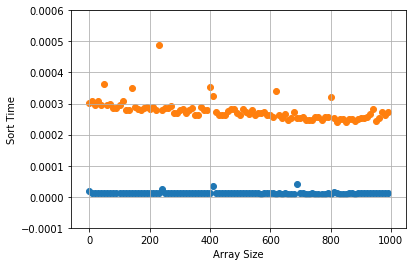

In [200]:
import matplotlib.pyplot as plt
timeInsert = []
timeBuble = []
n = []
for x in range(0,1000,10):
    timeStart = time.time()
    insertsort(Zahlen)
    timeStop = time.time()
    timeNeded = timeStop-timeStart
    timeInsert.append(timeNeded)

    timeStart = time.time()
    bublesort(Zahlen)
    timeStop = time.time()
    timeNeded = timeStop-timeStart
    timeBuble.append(timeNeded)
    n.append(x)
    
    
    
plt.scatter(n, timeInsert)
plt.scatter(n, timeBuble)
plt.xlabel("Array Size")
plt.ylabel("Sort Time")
plt.grid(True)
plt.ylim(-0.0001, 0.0006)
plt.show()

Wieso erhalten Sie verschiedene Ergebnisse für die Laufzeit eines Algorithmus, wenn Sie zwei Datensätze mit der gleichen Länge aber unterschiedlichen Werten untersuchen?

Zusatzaufgabe: Implementieren Sie den Quicksort Algorithmus und vergleichen Sie die Laufzeit mit den anderen beiden Algorithmen.

## Aufgabe (b)
Das numpy Paket ist sehr nützlich bei der Analyse von Datenmengen. Wir werden hier ein paar wichtige Funktionen besprechen, die Sie auch in den anderen Aufgaben gerne benutzen können.

Sie können Arrays (also im Grunde Tabellen) zunächst erstellen bevor Sie sie mit Werten füllen. Dazu müssen Sie aber angeben wie groß das Array sein soll (also seine shape). 

Erstellen Sie verschiedene Arrays mit den Befehlen np.zeros((2, 3)), np.ones((4, 4)), np.random.rand(4, 2).

In [201]:
nullen = np.zeros((2, 3))
einsen = np.ones((4, 4))
zufall = np.random.rand(4, 2)
print(zufall)

[[0.45344544 0.07844992]
 [0.78511797 0.87986861]
 [0.52949872 0.69056902]
 [0.70672396 0.25583269]]


Was tun diese Funktionen?

In [202]:
#np.zeros((2, 3)) gibt ein Array in den übergebenen Dimensonen gefüllt mit 0en zurück
#np.ones((2, 3)) gibt ein Array in den übergebenen Dimensonen gefüllt mit 1en zurück
#np.random.rand((2, 3)) gibt ein Array in den übergebenen Dimensonen gefüllt mit zufälligen zahlen zurück

Wenden Sie die .shape, len() und type() auf die Arrays an. Was tun diese Funktionen?

In [203]:
print(np.shape(nullen)) #Gibt die dimension des Arrays zurück
print(len(nullen))
print(type(nullen))

(2, 3)
2
<class 'numpy.ndarray'>


Sie können sich Teile der Numpy Arrays ausgeben lassen über Test_Array[a:b:c]. Dabei sind 'a' und 'b' wie bei Listen der Anfang und Ende des Bereichs, und c die Schrittweite. Testen Sie dies an den vorher erstellten Arrays aus. Die Indizes müssen natürlich für jede Dimension des Arrays einzeln angegeben werden.

In [204]:
zufall = np.random.rand(16, 8)
zufall[0:16:4][:]

array([[0.29439049, 0.39538923, 0.86524163, 0.44539587, 0.99869825,
        0.62073668, 0.69582856, 0.8770957 ],
       [0.12896839, 0.02531748, 0.74810142, 0.75768422, 0.31941918,
        0.61122183, 0.22989515, 0.4517678 ],
       [0.99878248, 0.62446245, 0.46976094, 0.66205012, 0.05635256,
        0.1699793 , 0.87897608, 0.0241786 ],
       [0.51921162, 0.11029383, 0.34720144, 0.08883919, 0.9108972 ,
        0.96819056, 0.40073606, 0.58850894]])


Gegeben sei das folgende Array:

In [205]:
Random_Array = np.random.rand(10, 5)

Welchen Teil des Arrays wird durch den folgenden Ausdruck ausgegeben:

In [206]:
Random_Array[:5,::2]

array([[0.92838731, 0.95024562, 0.23791644],
       [0.69702646, 0.30670252, 0.24330146],
       [0.67050138, 0.11395882, 0.72081297],
       [0.41539765, 0.49129547, 0.85340366],
       [0.04852384, 0.52962351, 0.32467655]])

In [207]:
# : Gibt alle Elemente mit & bis zum angegebenen indizi aus
# :: Gibt alle Elemente mit & bis zum angegebenen  indizi +1 aus

Erstellen Sie zwei Arrays a und b (gefüllt mit Nullen), mit der shape (2, 2). Setzen Sie dann beliebige Werte an die Stellen der Nullen. Was tut der Multiplikations-Operator a*b?

In [208]:
a = np.zeros((2, 2))
b = np.zeros((2, 2))
c = a*b
print(a)
print(b)
print(c)

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


Was tut dagegen die Funktion np.dot(a, b)?

In [209]:
 np.dot(a, b)


array([[0., 0.],
       [0., 0.]])

Erstellen Sie ein Array mit Zufallsdaten der Größe (5,5). Was tut np.diag(Array)?

In [210]:
Array = np.random.rand(5,5)
print(Array)
np.diag(Array) # Gibt die diagnoale einer nxn matrix aus (linksoben -> rechtsunten)

[[0.52858753 0.21426189 0.76935249 0.36197028 0.44307112]
 [0.71751553 0.58604356 0.4033527  0.35005603 0.14150163]
 [0.61439938 0.77781095 0.44157294 0.077505   0.37681239]
 [0.96662159 0.49759557 0.18640599 0.77517883 0.17430326]
 [0.68305011 0.79712726 0.67996627 0.0443945  0.26439562]]


array([0.52858753, 0.58604356, 0.44157294, 0.77517883, 0.26439562])

Oft müssen Funktionen wie np.mean nur auf bestimmte Bereiche eines Arrays angewendet werden, z.B. nur entlang einer Achse des Arrays. Nehmen Sie z.B. an, die Anzahl der neu an Corona Infizierten wurde über 30 Tage in 5 verschiedenen Landkreisen ermittelt. Alle Daten befinden sich im folgenden Array:

In [211]:
Corona_Infizierte = np.random.randint(300, size=(30, 5))
print("Das Array hat die shape:", Corona_Infizierte.shape)

Das Array hat die shape: (30, 5)


Wir wollen jetzt wissen, wie sich die Anzahl der neu Infizierten, gemittelt über alle Landkreise über die Zeit verhält. Die Mittelung muss also nur über eine bestimmte Achse erfolgen. Finden Sie heraus welche der beiden Funktionen hier die Richtige ist:

In [212]:
Mean_1 = np.mean(Corona_Infizierte, axis=0)
Mean_2 = np.mean(Corona_Infizierte, axis=1)

## Aufgabe (c)
Suchen Sie sich die absolute Anzahl der in Deutschland an Corona gestorbenen Menschen über die letzten 10 Tage (nicht die pro Tag Gestorbenen, sondern die absolute Zahl der bisher Gestorbenen Patienten). Stellen Sie die Entwicklung graphisch mit dem scatter Befehl dar.

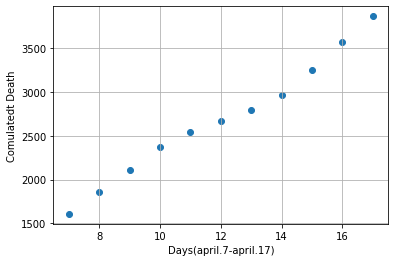

In [213]:
coronadeath = np.array([[7,8,9,10,11,12,13,14,15,16,17], [1607,1861,2107,2373,2544,2673,2799,2969,3254,3569,3868]])
plt.scatter(coronadeath[0][:], coronadeath[1][:])
plt.ylabel("Comulatedt Death")
plt.xlabel("Days(april.7-april.17)")
plt.grid(True)
plt.show()

Nehmen wir an, diese Anzahl wächst linear an. Dann kann sie beschrieben werden durch eine lineare Funktion der Form $f(x) = m*x + b$.
Schätzen Sie die Parameter $m$ und $b$ per Augenmaß aus dem Plot den Sie erstellt haben oder durch probieren und zeichnen Sie die Funktion in die Abbildung gemeinsam mit den Punkten ein. Die Funktion muss nur ungefähr passen, nicht perfekt!

[209.3181818181818, 181.27272727272702]


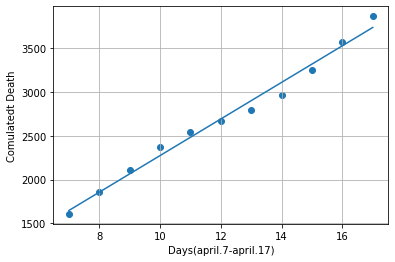

In [214]:
def mean(innput):
    buff = 0
    for cnt in range(len(innput)):
        buff += innput[cnt]
    return buff/len(innput)

def linregresion(x,y):
    buff1 = 0.
    buff2 = 0.
    output = [0. , 0.]
    xmean = mean(x)
    ymean = mean(y)
    
    for cnt1 in range(len(x)):
        buff1 += x[cnt1] * y[cnt1]
        buff2 += x[cnt1] * x[cnt1]
        
    buff1 -= len(x) * xmean * ymean
    buff2 -= len(x) * xmean ** 2
    output[0] = buff1/buff2
    output[1] = ymean-output[0]*xmean
    return output

def linfunk(a,b,start,end):
    buff = [[],[]]
    for cnt in range(start, end+1):
        buff[0].append(cnt)
        buff[1].append(cnt*a+b)

linarisation = linregresion(coronadeath[0], coronadeath[1])
print(linarisation)
lindeeath = linfunk(linarisation[0],linarisation[1],7,17)
plt.scatter(coronadeath[0], coronadeath[1])
plt.plot(lineardeath[0],lineardeath[1])
plt.ylabel("Comulatedt Death")
plt.xlabel("Days(april.7-april.17)")
plt.grid(True)
plt.show()

Ein Maß dafür wie gut die lineare Funktion die Daten erklärt ist die "Residuenquadratsumme". Sie ist definiert als die quadratische Abweichung der Datenpunkte von dem Wert der linearen Funktion (summiert über alle $n$ Datenpunkte). Sei $(x_i, y_i)$ ein Datenpunkt (x_i ist der Tag, y_i die Zahl der Corona Toten am Tag x_i). Dann ist die Residuenquadratsumme gegeben durch:

$SQR = \sum\limits_{i=1}^{n} (y_i-f(x_i))^2$

Berechnen Sie SQR für die Datenpunkte und Ihre ermittelte Funktion.

In [215]:
def sqr(datenpunkt, näherung):
    buff = 0.
    for cnt in range(len(datenpunkt)):
        buff += (datenpunkt[cnt]-näherung[cnt])**2
    return buff

sqr(coronadeath[1],lineardeath[1])
        

70599.77272727274

Variieren Sie Ihre ermittelten Paremeter $m$ und $b$ jeweils 10% nach oben und unten (das führt zu 9 verschiedenen Kombinationen von $m$ und $b$). Berechnen Sie für alle Kombinationen wieder die SQR.

In [216]:
def weightchanger(argument):
        if argument == 0: return 0.9
        elif argument == 2: return 1.0
        elif argument == 1: return 1.1
    
for cnt1 in range(3):
    for cnt2 in range(3):
        Mweight = weightchanger(cnt1) 
        Bweight = weightchanger(cnt2) 
        lindeeath = linfunk(linarisation[0]* Mweight,linarisation[1]*Bweight,7,17)
        print("M" + str(Mweight) + "und B*" + str(Mweight) + " => SQR = "+str(sqr(coronadeath[1],lineardeath[1])))
       


M0.9und B*0.9 => SQR = 70599.77272727274
M0.9und B*0.9 => SQR = 70599.77272727274
M0.9und B*0.9 => SQR = 70599.77272727274
M1.1und B*1.1 => SQR = 70599.77272727274
M1.1und B*1.1 => SQR = 70599.77272727274
M1.1und B*1.1 => SQR = 70599.77272727274
M1.0und B*1.0 => SQR = 70599.77272727274
M1.0und B*1.0 => SQR = 70599.77272727274
M1.0und B*1.0 => SQR = 70599.77272727274


Was könnten Gründe dafür sein, dass die lineare Funktion die Datenpunkte nicht perfekt abbilden. Es gibt zahlreiche Gründe dafür, nennen Sie zwei.

In [217]:
#Die zahl der gestorbenen partienten läst sich besser als logistische kurve ausdrücken da sie direkt von der ANzahl infizierten abhängig ist

Was ist die Bedeutung der Parameter $m$ und $b$ in Bezug auf die Entwicklung der gestorbenen Patienten?

In [218]:
#m anfangs welle (Partienten die zunächst unbemerkt an der Spezifischen erkrankung versterben und anschliesend erst dazu gezählzt werden)
#b täglliches wachstum an toten.

Benutzen Sie Ihre Funktion mit den anfänglichen Parametern um die Anzahl der Toten am nächsten Tag vorherzusagen.

In [219]:
deathonapril18 = linarisation[0]*18 + linarisation[1]
print("Deathcount with linfunc :" + str(deathonapril18))
print("Deathcount realdata : 4110")
print("Error in Percentig:" + str(((4110/deathonapril18)-1)*100))

Deathcount with linfunc :3948.9999999999995
Deathcount realdata : 4110
Error in Percentig:4.076981514307421


Wir haben hier einen Bereich des ML bearbeitet, den wir schon in der 1. Vorlesung kennengelernt haben. In welche Kategorie fällt die Analyse (in der Abbildung auf Seite 15 des Skripts der 1. Vorlesung).

In [220]:
#REgresions lernen

## Aufgabe (d)
Wir untersuchen Blutproben von Corona Infizierten und messen dabei zwei Blutwerte 'Mess_A' und 'Mess_B'. Anscheinend kann man anhand der beiden Werte bestimmen ob die Person infiziert ist oder nicht. Der Zusammenhang ist aber nicht trivial. Von einem Test der schon funktioniert (der aber sehr lange dauert, daher wollen wir einen neuen schnelleren Test entwickeln) wissen wir für die bisherigen Daten ob die Person Infiziert ist oder nicht.

Laden Sie die Blutwerte von 500 Patienten ein per Blutwerte = np.load("Blutwerte.npy"). Laden Sie auch die Angabe ein, ob die Person infiziert ist oder nicht Infiziert = np.load("Infiziert.npy"). Machen Sie sich klar wie die Daten aufgebaut sind (über shape). Das erste Array beinhaltet die beiden Blutwerte für jeden Patienten (jeweils Werte zwischen 0 und 1). Das zweite Array beinhaltet 'Einsen' (infiziert) und 'Nullen' (gesund).

In [221]:
Blutwerte = np.load("Blutwerte.npy")
Infiziert = np.load("Infiziert.npy")
print(Blutwerte)
print(Infiziert)

[[2.49031242e-01 4.89686806e-01]
 [9.61096254e-02 6.94491864e-01]
 [1.01366243e-01 7.52949371e-01]
 [9.45863537e-01 4.14299900e-01]
 [4.26630852e-01 6.46589224e-01]
 [4.59419331e-01 2.32524468e-01]
 [1.67462618e-01 8.37607830e-01]
 [8.29810575e-01 5.00877892e-01]
 [7.10250070e-02 4.45499896e-01]
 [7.49155129e-02 6.08833283e-01]
 [2.23514774e-01 5.59967762e-01]
 [5.09568923e-01 5.65840066e-01]
 [9.67395664e-01 2.57034828e-01]
 [7.65091948e-01 4.32400580e-01]
 [7.85516609e-01 5.53591346e-01]
 [6.12795056e-02 9.72844733e-01]
 [7.24796402e-01 5.90037773e-01]
 [1.24480848e-01 5.96894536e-01]
 [5.65996260e-01 9.25328118e-01]
 [4.69179303e-01 1.46598053e-01]
 [4.46125336e-01 5.89150475e-01]
 [4.11048484e-01 4.05865047e-02]
 [3.21728072e-02 5.63465711e-01]
 [1.43603757e-01 2.51801439e-01]
 [8.09760833e-01 2.74473005e-01]
 [6.38118750e-01 5.51241051e-01]
 [5.84294894e-01 9.28896906e-01]
 [2.50196846e-01 3.32311363e-01]
 [1.71257137e-01 8.48937441e-01]
 [2.09815049e-01 1.83324375e-01]
 [5.143093

Um die Daten darzustellen können wir die Personen in zwei Gruppen einteilen:

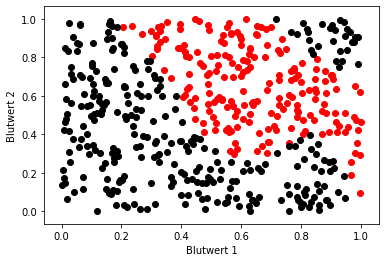

In [222]:
Patienten_Positiv = Blutwerte[Infiziert==1]
Patienten_Negativ = Blutwerte[Infiziert==0]

import matplotlib.pyplot as plt
plt.scatter(Patienten_Positiv[:, 0], Patienten_Positiv[:, 1], color="red")
plt.scatter(Patienten_Negativ[:, 0], Patienten_Negativ[:, 1], color="black")
plt.xlabel("Blutwert 1")
plt.ylabel("Blutwert 2")
plt.show()

Es werden nun Blutwerte von neuen Patienten gemessen. Anhand der bisherigen Ergebnisse soll abgeschätzt werden, ob die Patienten infiziert oder nicht infiziert sein könnten.

Für diese Abschätzung nutzen wir die Nächste-Nachbarn-Klassifikationsmethode. Wir bestimmen zuerst für den neuen Datenpunkt die drei nächsten Nachbarn in den bisherigen Daten.  Wenn zwei oder drei der Nachbarn positiv gestestet wurden, deklarieren wir den neuen Patienten ebenfalls als positiv. Ansonsten (das heißt bei null oder nur einem positiven Nachbarn) deklarieren wir den neuen Patienten als negativ.

Laden sie die Blutwerte der neuen zehn Patienten ein ("Neue_Blutwerte.npy").

In [223]:
NeuePartienten = np.load("Neue_Blutwerte.npy")
print(NeuePartienten)

[[0.6  0.28]
 [0.2  0.6 ]
 [0.8  0.6 ]
 [0.55 0.9 ]
 [0.24 0.82]
 [0.55 0.9 ]
 [0.91 0.35]
 [0.33 0.78]
 [0.95 0.14]
 [0.71 0.3 ]]


Bestimmen Sie für jeden der neuen Blutwerte, den euklidischen Abstand zu den 500 bisherigen Datenpunkten. Sie können dafür ein Array definieren welches die Abstände speichert (Größe (500, 10)). Für den euklidischen Abstand brauchen sie die Wurzelfunktion, die ist gegeben durch:

In [227]:
def getdistance(pointa, pointb):
    xdist = pointa[0] - pointb[0]
    ydist = pointa[1] - pointb[1]
    return np.sqrt(xdist**2 + ydist**2)

def Healthcheck(NeuerPartient,Data_Positiv, Data_Negativ):
    distHealthy = []
    distSick = []
    for case in Data_Positiv:
        distSick.append(getdistance(NeuerPartient,case))
    for case in Data_Negativ:
        distHealthy.append(getdistance(NeuerPartient,case))

    distHealthy.sort()
    distSick.sort()
    NextHealthy = distHealthy[:3]
    NextSick = distSick[:3]
    NextOnes = [[],[],[],[],[],[]]
    for cnt in range(3):
        NextOnes[cnt].append(NextHealthy[cnt])
        NextOnes[cnt].append(0)
    for cnt in range(3):
        NextOnes[cnt+3].append(NextSick[cnt])
        NextOnes[cnt+3].append(1)

    NextOnes.sort(key=lambda NextOnes:NextOnes[0])

    NextOnes = NextOnes[:][:3]

    temp = 0
    for cnt in range(3):
        temp += NextOnes[cnt][1]

    if temp >= 2: return True
    else: return False
  
New_Sick = [[],[]]
New_Healthy = [[],[]]

for case in NeuePartienten:
    buff = Healthcheck(case, Patienten_Positiv, Patienten_Negativ)
    if buff:
        New_Sick[0].append(case[0])
        New_Sick[1].append(case[1])
    else:
        New_Healthy[0].append(case[0])
        New_Healthy[1].append(case[1])
        
print(New_Sick)

[[0.8, 0.55, 0.55, 0.91, 0.71], [0.6, 0.9, 0.9, 0.35, 0.3]]


Bestimmen Sie jetzt für die 10 neuen Datenpunkte in welche Kategorie sie fallen, indem Sie die drei nächsten Nachbarn bestimmen und auf Grund deren Testergebnis entscheiden. Überprüfen Sie Ergebnis indem Sie die neuen Punkte mit in die Abbildung plotten (in einer neuen Farbe).

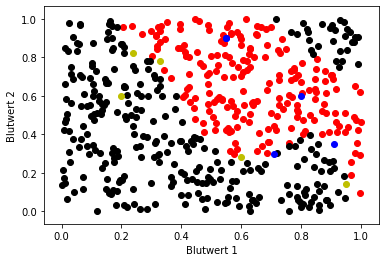

In [226]:
plt.scatter(Patienten_Positiv[:, 0], Patienten_Positiv[:, 1], color="red")
plt.scatter(Patienten_Negativ[:, 0], Patienten_Negativ[:, 1], color="black")
plt.scatter(New_Healthy[0][:], New_Healthy[1][:], color="y")
plt.scatter(New_Sick[0][:], New_Sick[1][:], color="b")
plt.xlabel("Blutwert 1")
plt.ylabel("Blutwert 2")
plt.show()


Nächste Nachbar Suchen können unter Umständen sehr aufwendig werden, wenn es um große Daten geht. Insbesondere die Berechnung der Abstandsmatrix dauert dann lange und nimmt viel Speicher in Anspruch. Nehmen Sie an, Sie haben $N=1.000.000$ Datenpunkte und berechnen den Abstand jedes Datenpunktes zu allen anderen Punkten (d.h. eine NxN Matrix). Jeder Eintrag ist eine float Zahl und hat die Größe von 4 byte. Wie viel Platz belegt dann allein die Abstandsmatrix im Speicher (geben Sie die Größe in einer passenden Einheit an, $1 \rm kb \approx 1000 \rm \, byte$ usw.).

In [228]:
N = 1000000
K = 1000
F = 4
s = (N**2)*(F/K)
print("Diese Berechnung benötigt " + str(s) + " kb" )

Diese Berechnung benötigt 4000000000.0 kb


Auch diese Aufgabe fällt in einen Bereich den wir bereits in der 1. Vorlesung besprochen haben. In welche Kategorie fällt die Analyse (in der Abbildung auf Seite 15 des Skripts der 1. Vorlesung).